In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Food_Recipe.csv'
recipes_df = pd.read_csv(file_path)

# Display basic information about the dataset
print(recipes_df.info())

# Show the first few rows of the dataset
print(recipes_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7410 non-null   object 
 1   description           7410 non-null   object 
 2   cuisine               7344 non-null   object 
 3   course                7260 non-null   object 
 4   diet                  7266 non-null   object 
 5   ingredients_name      7401 non-null   object 
 6   ingredients_quantity  7402 non-null   object 
 7   prep_time (in mins)   7381 non-null   float64
 8   cook_time (in mins)   7381 non-null   float64
 9   instructions          7410 non-null   object 
 10  image_url             7410 non-null   object 
dtypes: float64(2), object(9)
memory usage: 636.9+ KB
None
                                                name   
0  Healthy Yogurt Parfait with Oats and Fresh Fru...  \
1        Udupi Style Ash Gourd Coconut Curry Recipe    
2  

In [2]:
# Check for missing values
missing_values = recipes_df.isnull().sum()
print("Missing values in each column:\n\n", missing_values)

# Check for duplicate rows
duplicate_rows = recipes_df[recipes_df.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print("Number of duplicate rows:", num_duplicate_rows)


Missing values in each column:

 name                      0
description               0
cuisine                  66
course                  150
diet                    144
ingredients_name          9
ingredients_quantity      8
prep_time (in mins)      29
cook_time (in mins)      29
instructions              0
image_url                 0
dtype: int64
Number of duplicate rows: 17


In [3]:

# Fill missing values with an empty string
recipes_df['ingredients_name'] = recipes_df['ingredients_name'].fillna('')

# Ensure that all values in 'ingredients_name' are strings
recipes_df['ingredients_name'] = recipes_df['ingredients_name'].astype(str)

# Calculate median values for 'prep_time (in mins)' and 'cook_time (in mins)'
prep_time_median = recipes_df['prep_time (in mins)'].median()
cook_time_median = recipes_df['cook_time (in mins)'].median()

# Impute missing values with median if median is not 0.0
if prep_time_median != 0.0:
    recipes_df['prep_time (in mins)'].fillna(prep_time_median, inplace=True)

if cook_time_median != 0.0:
    recipes_df['cook_time (in mins)'].fillna(cook_time_median, inplace=True)


# Impute missing values in 'ingredients_name' and 'ingredients_quantity' with mode
recipes_df['ingredients_quantity'].fillna(recipes_df['ingredients_quantity'].mode()[0], inplace=True)

# Impute missing values in 'cuisine', 'course', and 'diet' with 'Unknown'
recipes_df['cuisine'].fillna('Unknown', inplace=True)
recipes_df['course'].fillna('Unknown', inplace=True)
recipes_df['diet'].fillna('Unknown', inplace=True)

# Handle duplicate rows
recipes_df = recipes_df.drop_duplicates()

# Display the number of missing values in each column after imputation
missing_values = recipes_df.isnull().sum()
print("Missing values in each column after imputation:\n\n", missing_values)


Missing values in each column after imputation:

 name                    0
description             0
cuisine                 0
course                  0
diet                    0
ingredients_name        0
ingredients_quantity    0
prep_time (in mins)     0
cook_time (in mins)     0
instructions            0
image_url               0
dtype: int64


In [4]:
# Feature Engineering
# Combine text-based features into a single string for each recipe
recipes_df['combined_text'] = recipes_df['name'] + ' ' + recipes_df['description'] + ' ' + recipes_df['ingredients_name']

# Create a feature that counts the number of ingredients
recipes_df['ingredient_count'] = recipes_df['ingredients_name'].apply(lambda x: len(x.split(',')))

# Create a feature that adds the preparation time and cooking time
recipes_df['total_time (in mins)'] = recipes_df['prep_time (in mins)'] + recipes_df['cook_time (in mins)']

# Convert 'cuisine', 'course', and 'diet' columns to numerical format using label encoding
from sklearn.preprocessing import LabelEncoder
le_cuisine = LabelEncoder()
le_course = LabelEncoder()
le_diet = LabelEncoder()

recipes_df['cuisine_encoded'] = le_cuisine.fit_transform(recipes_df['cuisine'])
recipes_df['course_encoded'] = le_course.fit_transform(recipes_df['course'])
recipes_df['diet_encoded'] = le_diet.fit_transform(recipes_df['diet'])

# Display the first few rows of the dataset with the new features
print(recipes_df.head())



                                                name   
0  Healthy Yogurt Parfait with Oats and Fresh Fru...  \
1        Udupi Style Ash Gourd Coconut Curry Recipe    
2  Moongphali Bhindi Sabzi Recipe - Lady's Finger...   
3  Konkani Style Batata Song Recipe - Dry Red Chi...   
4          One Pot Vegetable Pasta With Beans Recipe   

                                         description               cuisine   
0  Healthy Yogurt Parfait with Oats and Fresh Fru...           Continental  \
1  Udupi Style Ash Gourd Coconut Curry Recipe is ...                 Udupi   
2  Moongphali Bhindi Sabzi Recipe is a quick and ...  North Indian Recipes   
3  Konkani Style Batata Song Recipe-Dry Red Chili...                Konkan   
4  One Pot Vegetable Pasta with Beans is filled w...       Italian Recipes   

            course                     diet   
0  World Breakfast               Vegetarian  \
1            Lunch               Vegetarian   
2            Lunch               Vegetarian   
3     

In [5]:
missing_values = recipes_df.isnull().sum()
missing_values

name                    0
description             0
cuisine                 0
course                  0
diet                    0
ingredients_name        0
ingredients_quantity    0
prep_time (in mins)     0
cook_time (in mins)     0
instructions            0
image_url               0
combined_text           0
ingredient_count        0
total_time (in mins)    0
cuisine_encoded         0
course_encoded          0
diet_encoded            0
dtype: int64

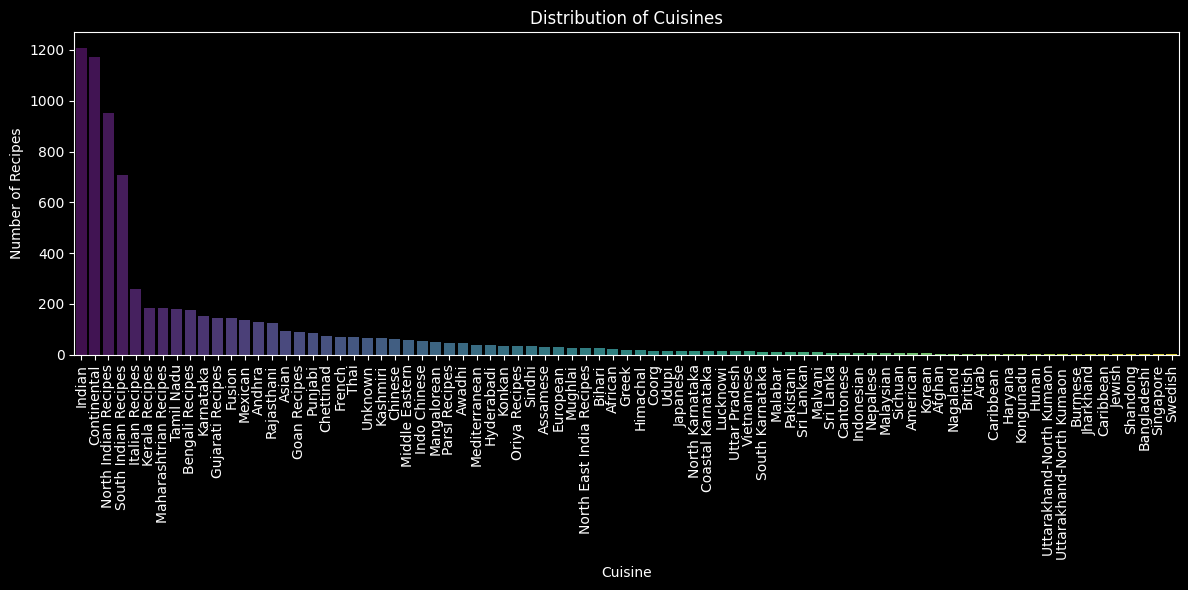

In [6]:
# Distribution of Cuisines

# Count the number of recipes for each cuisine
cuisine_counts = recipes_df['cuisine'].value_counts()

# Plot the distribution of cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Cuisines')
plt.tight_layout()
plt.show()


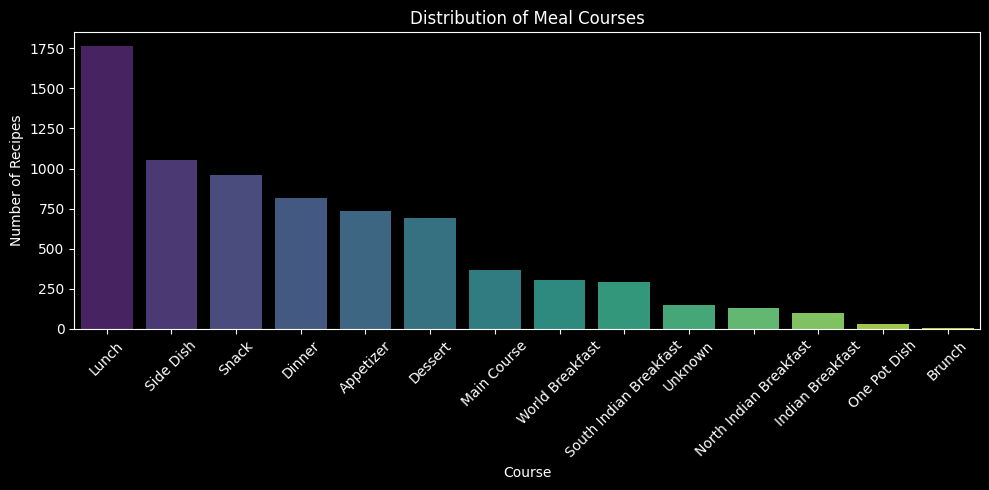

In [7]:
# Distribution of Meal Courses

# Count the number of recipes for each course
course_counts = recipes_df['course'].value_counts()

# Plot the distribution of courses
plt.figure(figsize=(10, 5))
sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Course')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Meal Courses')
plt.tight_layout()
plt.show()


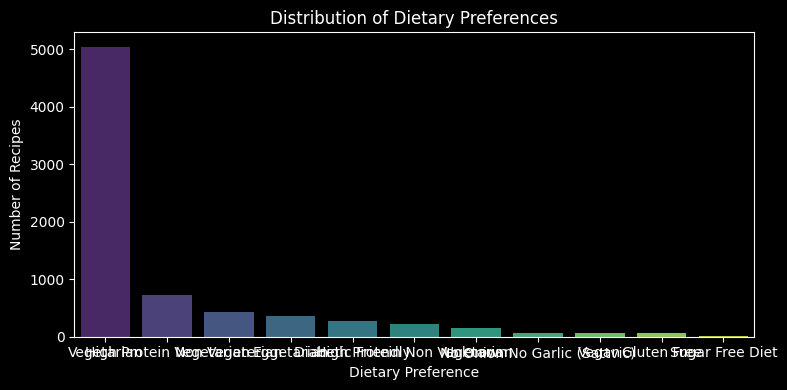

In [8]:
# Distribution of Dietary Preferences

# Count the number of recipes for each dietary preference
diet_counts = recipes_df['diet'].value_counts()

# Plot the distribution of dietary preferences
plt.figure(figsize=(8, 4))
sns.barplot(x=diet_counts.index, y=diet_counts.values, palette='viridis')
plt.xlabel('Dietary Preference')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Dietary Preferences')
plt.tight_layout()
plt.show()


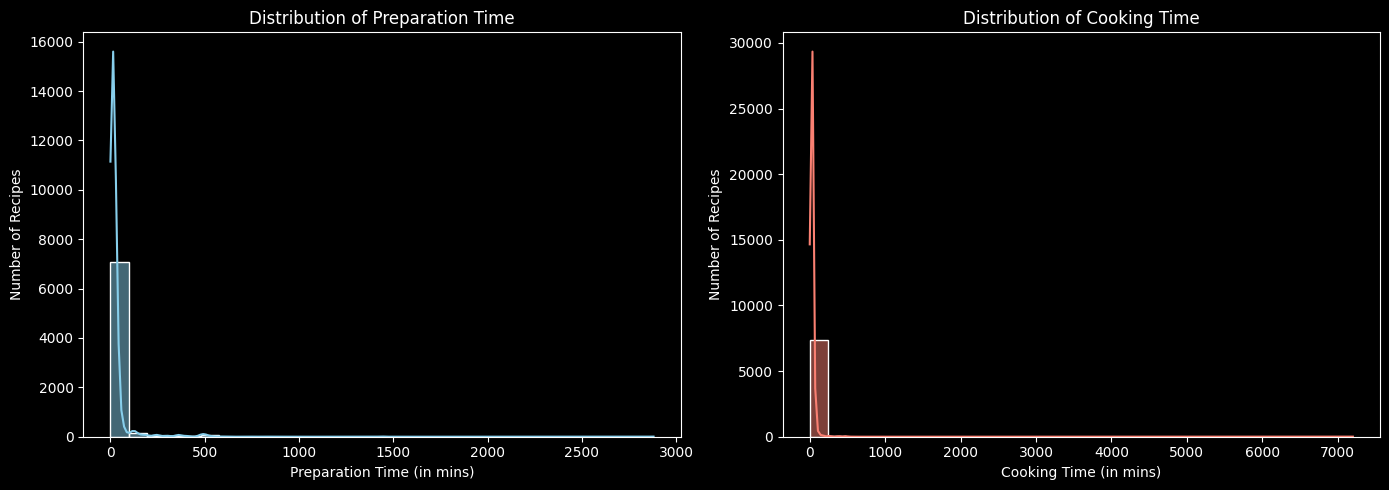

In [9]:
# Distribution of Preparation and Cooking Time

# Plot the distribution of preparation and cooking times
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Distribution of Preparation Time
sns.histplot(recipes_df['prep_time (in mins)'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Preparation Time')
axes[0].set_xlabel('Preparation Time (in mins)')
axes[0].set_ylabel('Number of Recipes')

# Distribution of Cooking Time
sns.histplot(recipes_df['cook_time (in mins)'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Cooking Time')
axes[1].set_xlabel('Cooking Time (in mins)')
axes[1].set_ylabel('Number of Recipes')

plt.tight_layout()
plt.show()


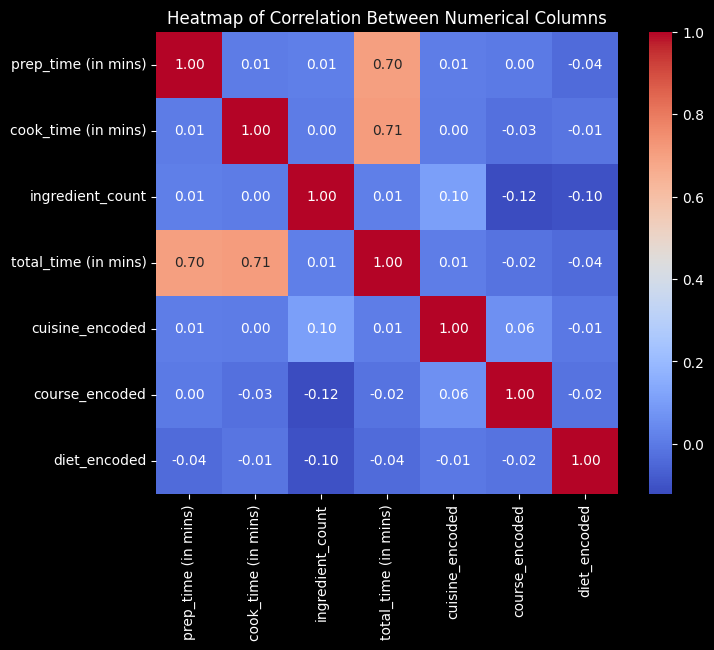

In [10]:
# Calculate the correlation matrix for numeric columns only
numeric_cols = recipes_df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Between Numerical Columns')
plt.show()


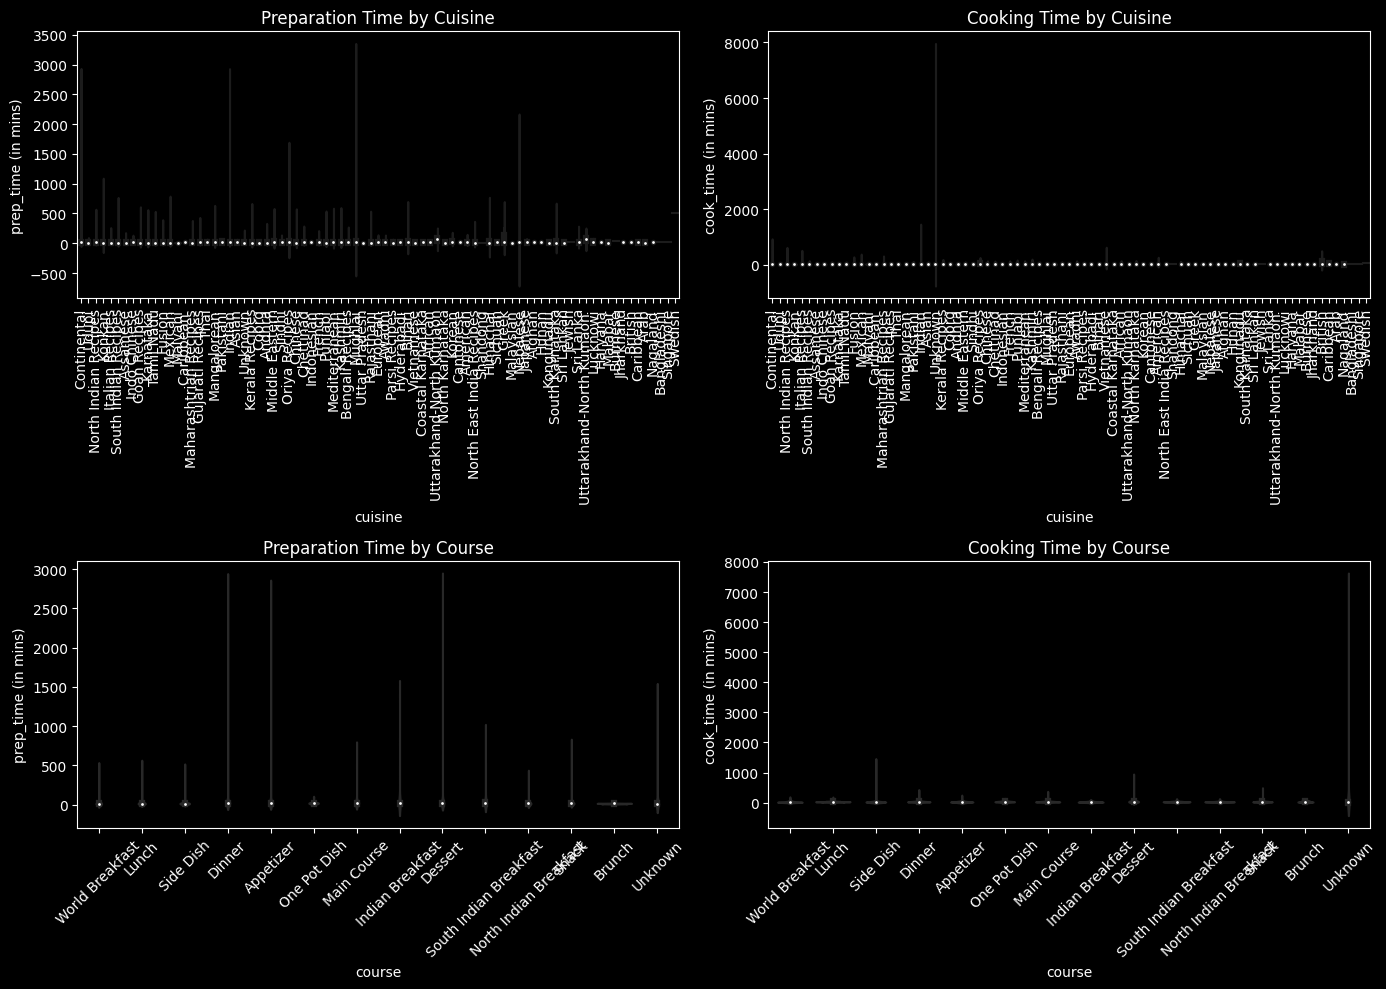

In [11]:
# Violin charts to visualize distribution of numerical columns with respect to different categories

# Prepare subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Violin chart for 'prep_time (in mins)' with respect to 'cuisine'
sns.violinplot(x='cuisine', y='prep_time (in mins)', data=recipes_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Preparation Time by Cuisine')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Violin chart for 'cook_time (in mins)' with respect to 'cuisine'
sns.violinplot(x='cuisine', y='cook_time (in mins)', data=recipes_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Cooking Time by Cuisine')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Violin chart for 'prep_time (in mins)' with respect to 'course'
sns.violinplot(x='course', y='prep_time (in mins)', data=recipes_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Preparation Time by Course')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Violin chart for 'cook_time (in mins)' with respect to 'course'
sns.violinplot(x='course', y='cook_time (in mins)', data=recipes_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Cooking Time by Course')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


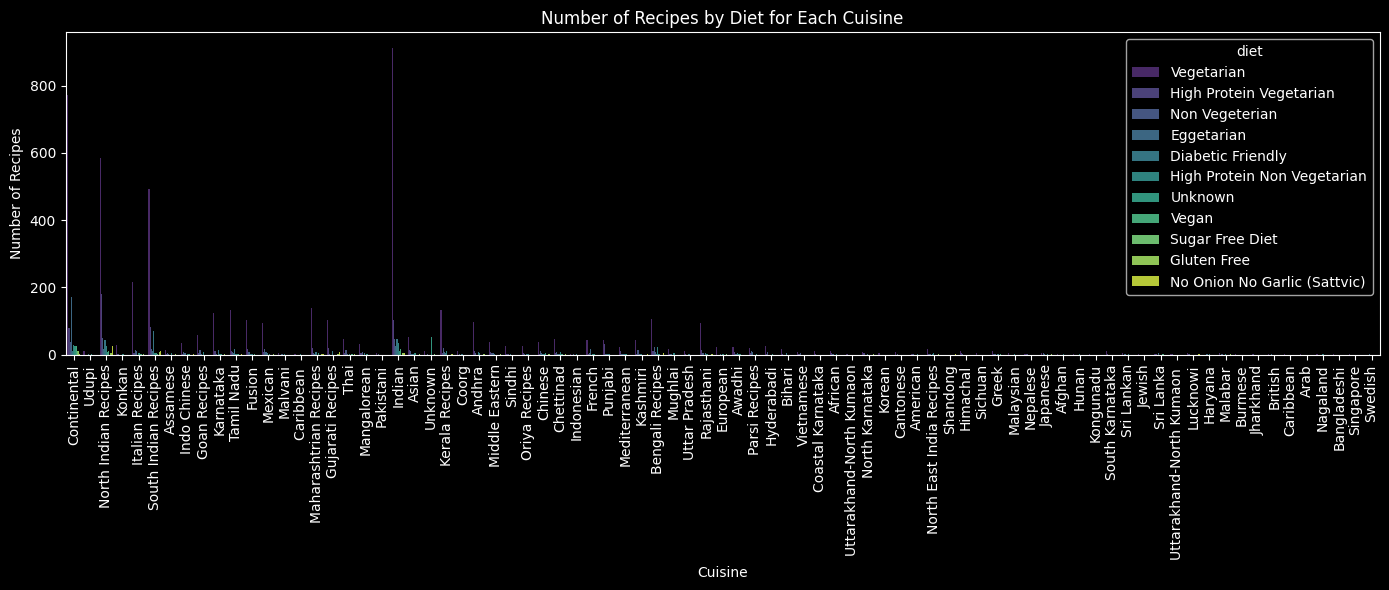

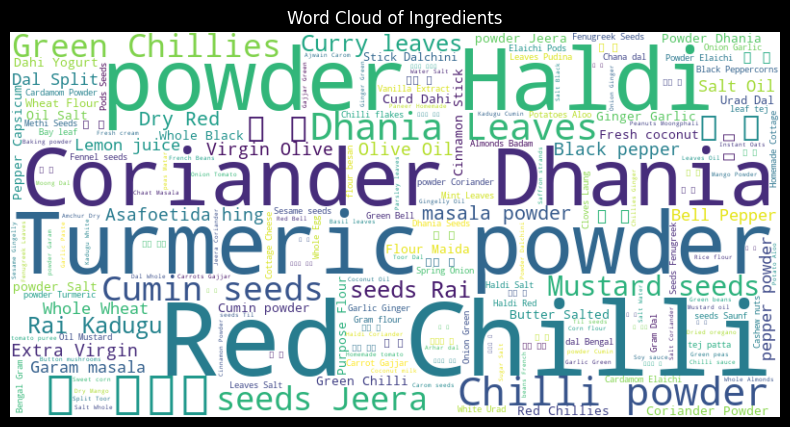

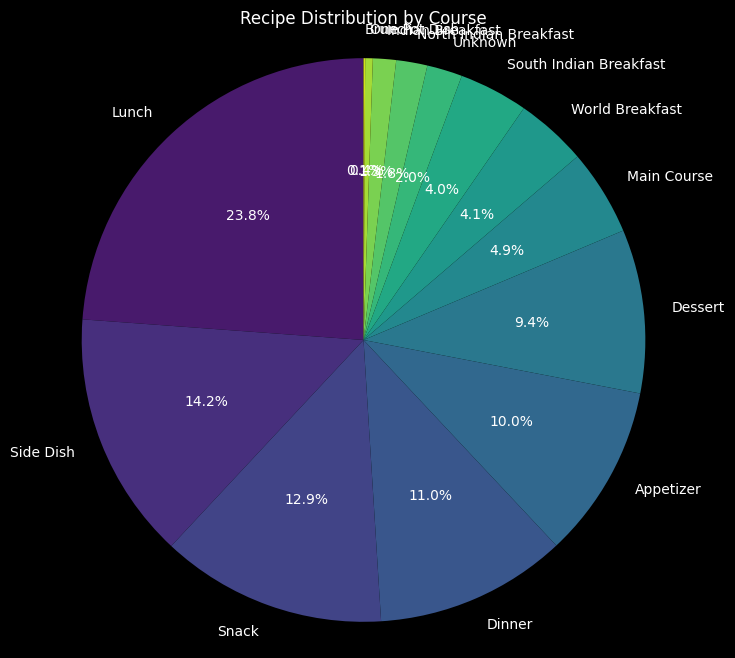

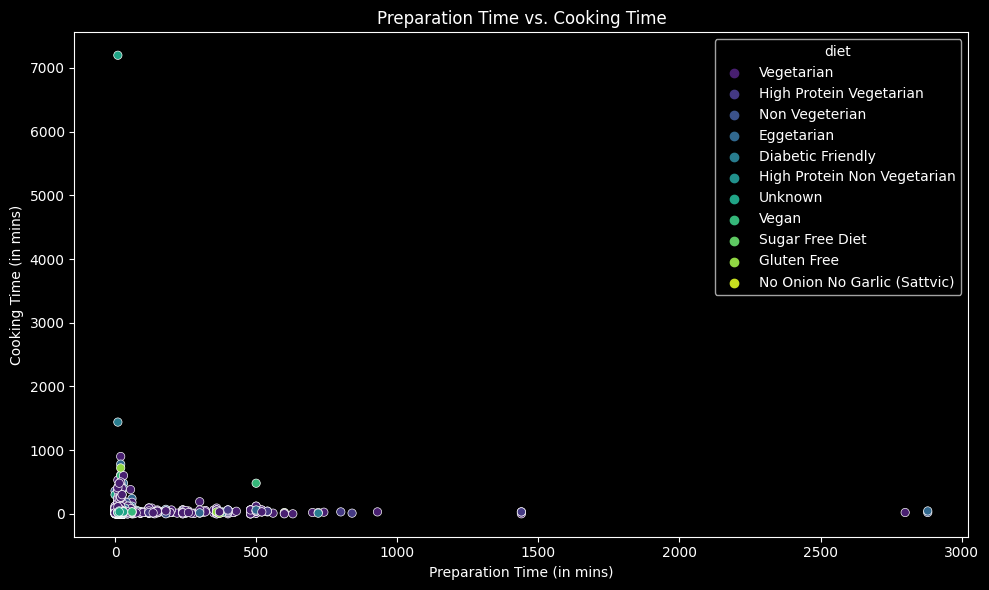

In [12]:
# Bar Chart of the Number of Recipes by Diet for Each Cuisine
plt.figure(figsize=(14, 6))
sns.countplot(x='cuisine', hue='diet', data=recipes_df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes by Diet for Each Cuisine')
plt.tight_layout()
plt.show()

# Word Cloud of Ingredients
from wordcloud import WordCloud
ingredients_str = ', '.join(recipes_df['ingredients_name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_str)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.show()


# Pie Chart of Recipe Distribution by Course
course_counts = recipes_df['course'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(course_counts)))
plt.title('Recipe Distribution by Course')
plt.axis('equal')
plt.show()

# Scatter Plot of Preparation Time vs. Cooking Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prep_time (in mins)', y='cook_time (in mins)', data=recipes_df, hue='diet', palette='viridis')
plt.xlabel('Preparation Time (in mins)')
plt.ylabel('Cooking Time (in mins)')
plt.title('Preparation Time vs. Cooking Time')
plt.tight_layout()
plt.show()


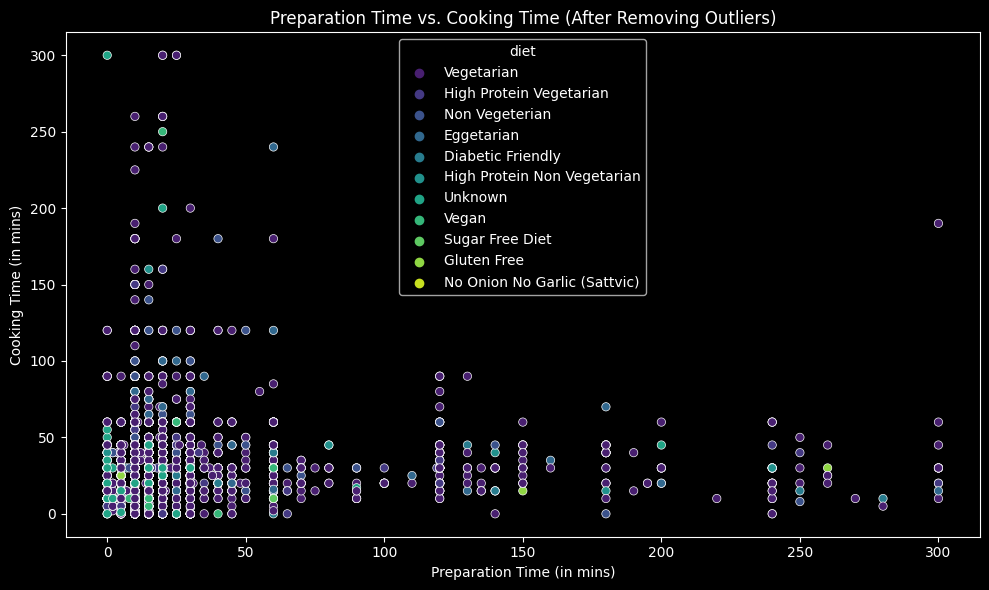

In [13]:
from scipy.stats import zscore

# Calculate Z-scores for 'prep_time (in mins)' and 'cook_time (in mins)'
recipes_df['prep_time_z'] = zscore(recipes_df['prep_time (in mins)'])
recipes_df['cook_time_z'] = zscore(recipes_df['cook_time (in mins)'])

# Remove rows with Z-scores greater than 3 or less than -3
recipes_no_outliers = recipes_df[(abs(recipes_df['prep_time_z']) <= 3) & (abs(recipes_df['cook_time_z']) <= 3)]

# Drop the Z-score columns
recipes_no_outliers = recipes_no_outliers.drop(columns=['prep_time_z', 'cook_time_z'])

# Scatter Plot of Preparation Time vs. Cooking Time (after removing outliers)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='prep_time (in mins)', y='cook_time (in mins)', data=recipes_no_outliers, hue='diet', palette='viridis')
plt.xlabel('Preparation Time (in mins)')
plt.ylabel('Cooking Time (in mins)')
plt.title('Preparation Time vs. Cooking Time (After Removing Outliers)')
plt.tight_layout()
plt.show()


In [14]:
# Check if 'name' and 'description' columns have the same values
same_values = (recipes_df['name'] == recipes_df['description']).sum()
same_values, recipes_df.shape[0]

(0, 7393)

In [15]:
# Rename recipes_no_outliers to recipes_df
recipes_df = recipes_no_outliers.copy()

# Display the first few rows of the renamed dataframe
recipes_df


,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,image_url,combined_text,ingredient_count,total_time (in mins),cuisine_encoded,course_encoded,diet_encoded
0,Healthy Yogurt Parfait with Oats and Fresh Fru...,Healthy Yogurt Parfait with Oats and Fresh Fru...,Continental,World Breakfast,Vegetarian,"Instant Oats (Oatmeal), Coconut milk, Honey, S...",For the oats 1/2 cup Instant Oats (Oatmeal) 1...,30.0,0.0,We begin making the Healthy Yogurt Parfait wit...,https://www.archanaskitchen.com/images/archana...,Healthy Yogurt Parfait with Oats and Fresh Fru...,10,30.0,19,13,10
1,Udupi Style Ash Gourd Coconut Curry Recipe,Udupi Style Ash Gourd Coconut Curry Recipe is ...,Udupi,Lunch,Vegetarian,"Vellai Poosanikai (Ash gourd/White Pumpkin), T...",500 grams Vellai Poosanikai (Ash gourd/White P...,10.0,30.0,To begin making the Udupi Style Ash Gourd Coco...,https://www.archanaskitchen.com/images/archana...,Udupi Style Ash Gourd Coconut Curry Recipe Ud...,17,40.0,75,5,10
2,Moongphali Bhindi Sabzi Recipe - Lady's Finger...,Moongphali Bhindi Sabzi Recipe is a quick and ...,North Indian Recipes,Lunch,Vegetarian,"Bhindi (Lady Finger/Okra), Oil, Ajwain (Carom ...","500 grams Bhindi (Lady Finger/Okra) , cut into...",10.0,20.0,"To make Moongphali Bhindi Sabzi Recipe, first ...",https://www.archanaskitchen.com/images/archana...,Moongphali Bhindi Sabzi Recipe - Lady's Finger...,10,30.0,57,5,10
3,Konkani Style Batata Song Recipe - Dry Red Chi...,Konkani Style Batata Song Recipe-Dry Red Chili...,Konkan,Side Dish,Vegetarian,"Potatoes (Aloo), Mustard seeds (Rai/ Kadugu), ...","4 Potatoes (Aloo) , peeled and cut into medium...",5.0,25.0,"To begin making the Konkani Style Batata Song,...",https://www.archanaskitchen.com/images/archana...,Konkani Style Batata Song Recipe - Dry Red Chi...,5,30.0,42,9,10
4,One Pot Vegetable Pasta With Beans Recipe,One Pot Vegetable Pasta with Beans is filled w...,Italian Recipes,Dinner,High Protein Vegetarian,"Pasta Fusilli, Green Bell Pepper (Capsicum), ...","1 cup Pasta Fusilli , or any pasta you like ...",10.0,30.0,To begin making the One Pot Vegetable Pasta wi...,https://www.archanaskitchen.com/images/archana...,One Pot Vegetable Pasta With Beans Recipe One ...,14,40.0,34,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Tomato Onion Bruschetta With Mint Mayo Recipe,A bruschetta is an Italian dish normally serve...,Italian Recipes,Appetizer,Unknown,"Baguette, Onions, Tomatoes, Del Monte Mint May...","1 Baguette , sliced 2 Onions , finely chopped...",10.0,20.0,To begin making the Tomato Onion Bruschetta wi...,https://www.archanaskitchen.com/images/archana...,Tomato Onion Bruschetta With Mint Mayo Recipe ...,9,30.0,34,0,8
7406,Tomatoes Stuffed With Mint Mayo And Paneer Recipe,Tomatoes stuffed with Del Monte Mint Mayo and ...,Continental,Side Dish,Unknown,"Paneer (Homemade Cottage Cheese), Del Monte Mi...","1/4 cup Paneer (Homemade Cottage Cheese) , cru...",20.0,30.0,To begin making the Tomatoes Stuffed With Mint...,https://www.archanaskitchen.com/images/archana...,Tomatoes Stuffed With Mint Mayo And Paneer Rec...,8,50.0,19,9,8
7407,Shrimp Stir Fry With Cheesy Dip Mayo Recipe,Shrimp Stir Fry With Cheesy Dip Mayo Recipe is...,Asian,Side Dish,Unknown,"Green Bell Pepper (Capsicum), Red Bell pepper ...","1/2 Green Bell Pepper (Capsicum) , julienned ...",15.0,45.0,To prepare Shrimp Stir Fry With Cheesy Dip May...,https://www.archanaskitchen.com/images/archana...,Shrimp Stir Fry With Cheesy Dip Mayo Recipe Sh...,18,60.0,5,9,8
7408,Sweet Potato Balls Recipe Stuffed With Cheesy ...,The Sweet Potato Balls recipe is a lip smackin...,Unknown,Appetizer,Unknown,"Sweet Potatoes, Coriander (Dhania) Leaves, Red...","3 Sweet Potatoes , large one, cooked, peeled a...",30.0,30.0,To begin making Sweet Potato Balls Recipe Stuf...,https://www.archanaskitchen.com/images/archana...,Sweet Potato Balls Recipe Stuffed With Cheesy ...,12,60.0,76,

In [16]:
import csv

with open('cleaned.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(recipes_df.itertuples())